<a href="https://colab.research.google.com/github/bilalboukerma/Transfer-Learning-Techniques-In-Images-Medical/blob/main/basic_image_manipulation_open_CV.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**<h1> Manipulating Images </h1>**


<h2>Objectives</h2>


In this lab, you will learn how to manipulate images, OpenCV image Arrays. You will learn how to copy an image to avoid aliasing. We will cover flipping images and cropping images. You will also learn to change pixel images; this will allow you to draw shapes, write text and superimpose images over other images.


<ul>
    <li><a href='https://#MI'>Manipulating Images </a>
        <ul>
            <li>Copying Images  </li>
            <li>Fliping Images </li>
            <li>Cropping an Image </li>
            <li>Changing Specific Image Pixels </li>

</ul>


***


We will be using these imported functions in the lab


In [ ]:
import matplotlib.pyplot as plt
import cv2
import numpy as np

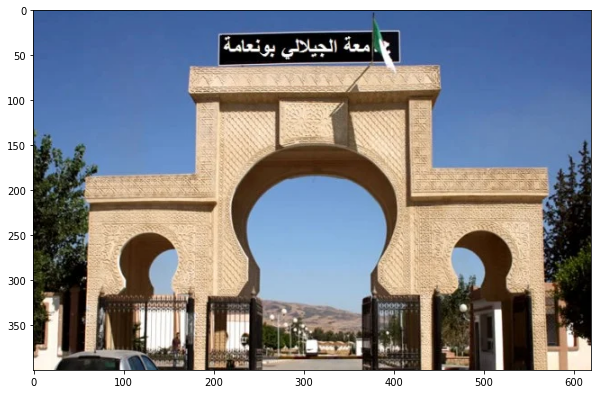

In [ ]:
ue = cv2.imread("University_entrance.jpg")
plt.figure(figsize=(10,10))
plt.imshow(cv2.cvtColor(ue, cv2.COLOR_BGR2RGB))
plt.show()

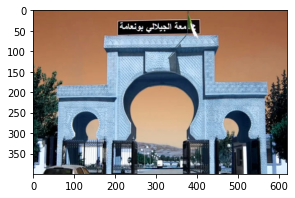

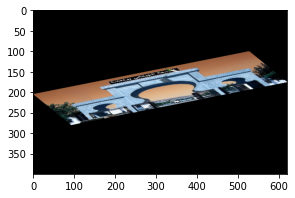

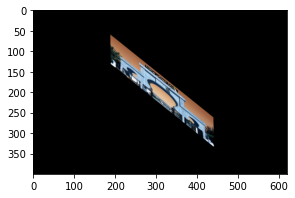

In [ ]:
src = np.array(ue)

srcTri = np.array( [[0, 0], [src.shape[1] - 1, 0], [0, src.shape[0] - 1]] ).astype(np.float32)
dstTri = np.array( [[0, src.shape[1]*0.33], [src.shape[1]*0.85, src.shape[0]*0.25], [src.shape[1]*0.15, src.shape[0]*0.7]] ).astype(np.float32)
warp_mat = cv2.getAffineTransform(srcTri, dstTri)
warp_dst = cv2.warpAffine(src, warp_mat, (src.shape[1], src.shape[0]))
# Rotating the image after Warp
center = (warp_dst.shape[1]//2, warp_dst.shape[0]//2)
angle = -50
scale = 0.6
rot_mat = cv2.getRotationMatrix2D( center, angle, scale )
warp_rotate_dst = cv2.warpAffine(warp_dst, rot_mat, (warp_dst.shape[1], warp_dst.shape[0]))
'''cv2.imshow('Source image', src)
cv2.imshow('Warp', warp_dst)
cv2.imshow('Warp + Rotate', warp_rotate_dst)'''

plt.figure(figsize=(10,10))
plt.subplot(121)
plt.imshow(src)
plt.figure(figsize=(10,10))
plt.subplot(121)
plt.imshow(warp_dst)
plt.figure(figsize=(10,10))
plt.subplot(121)
plt.imshow(warp_rotate_dst)

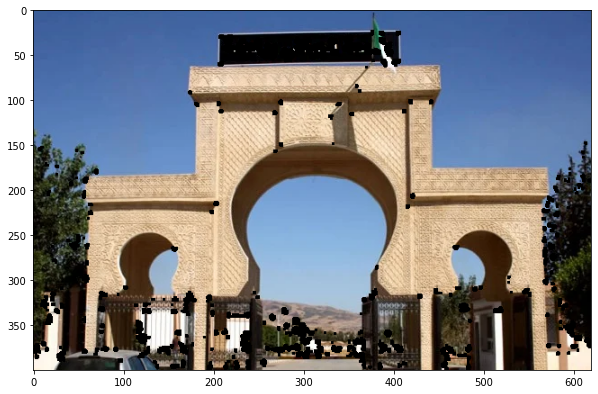

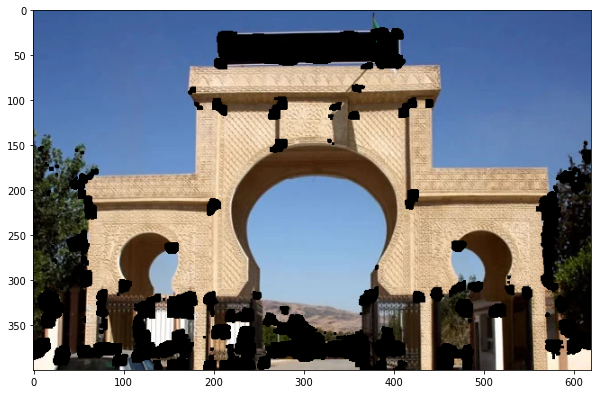

In [ ]:
img = cv2.imread('/content/University_entrance.jpg')
gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
gray = np.float32(gray)
# To detect only sharp corners
dst = cv2.cornerHarris(gray, blockSize=4, ksize=5, k=0.04)
# Result is dilated for marking the corners
dst = cv2.dilate(dst, None)
# Threshold for an optimal value, it may vary depending on the image
img[dst > 0.01*dst.max()] = [0,0,0]
#cv2.imshow('Harris Corners(only sharp)',img)
plt.figure(figsize=(10,10))
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.show()
# to detect soft corners
dst = cv2.cornerHarris(gray, blockSize=14, ksize=5, k=0.04)
dst = cv2.dilate(dst, None)
img[dst > 0.01*dst.max()] = [0,0,0]
#cv2.imshow('Harris Corners(also soft)',img)

plt.figure(figsize=(10,10))
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.show()

## Copying Images


If you want to reassign an array to another variable, you should use the `copy` method. If we do not apply the method `copy()`, the variable will point to the same location in memory. Consider the following array:


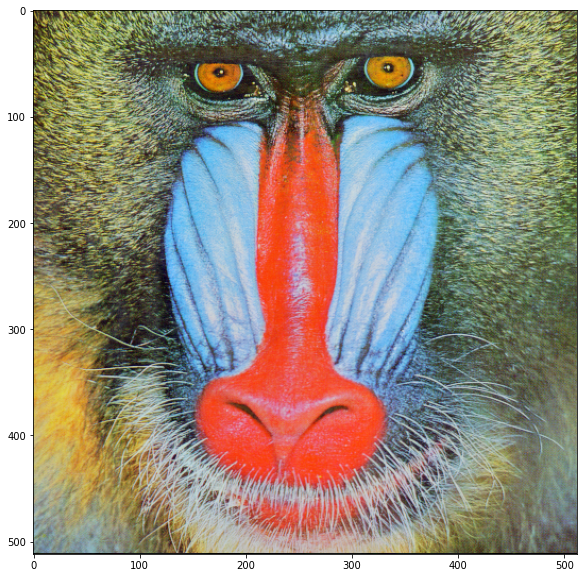

In [ ]:
baboon = cv2.imread("baboon.png")
plt.figure(figsize=(10,10))
plt.imshow(cv2.cvtColor(baboon, cv2.COLOR_BGR2RGB))
plt.show()

If we do not apply the method `copy()`, the new variable will point to the same location in memory:


In [ ]:
A = baboon

we use the `id` function to find the object's memory address; we see it is the same as the original array.


In [ ]:
id(A)==id(baboon)
id(A)

If we apply the method \`copy()</coode>, the memory address is different


In [ ]:
B = baboon.copy()
id(B)==id(baboon)

When we do not apply the method <code>copy()</code>, the variable will point to the same location in memory. Consider the array <code>baboon</code>, if we set all its values to zero, then all the values in <code>A</code> will be zero. This is because <code>baboon</code> and <code>A</code> point to the same place in memory, but <code>B</code> will not be affected.


In [ ]:
baboon[:,:,] = 0

NameError: ignored

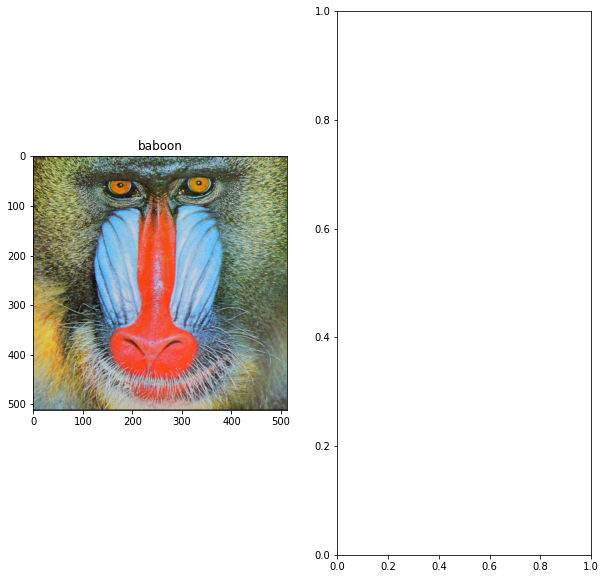

In [ ]:
plt.figure(figsize=(10,10))
plt.subplot(121)
plt.imshow(cv2.cvtColor(baboon, cv2.COLOR_BGR2RGB))
plt.title("baboon")
plt.subplot(122)
plt.imshow(cv2.cvtColor(A, cv2.COLOR_BGR2RGB))
plt.title("array A")
plt.show()

We see they are the same, this is called aliasing. Aliasing happens whenever one variable's value is assigned to another variable because variables are just names that store references to values. We can also compare <code>baboon</code> and array <code>B</code>:


In [ ]:
plt.figure(figsize=(10,10))
plt.subplot(121)
plt.imshow(cv2.cvtColor(baboon, cv2.COLOR_BGR2RGB))
plt.title("baboon")
plt.subplot(122)
plt.imshow(cv2.cvtColor(B, cv2.COLOR_BGR2RGB))
plt.title("array B")
plt.show()

They are different because they used the method copy.


## Fliping Images


Flipping images involves reordering the index of the pixels such that it changes the orientation of the image. Consider the following image:


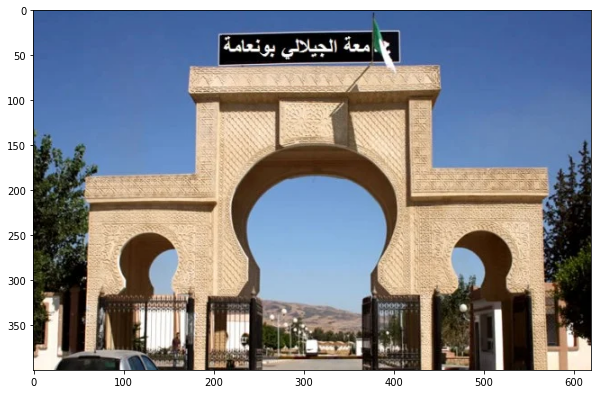

In [ ]:
image = ue#cv2.imread("cat.png")
plt.figure(figsize=(10,10))
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.show()

We can cast it to an array and find the shape:


In [ ]:
width, height,C=image.shape
print('width, height,C',width, height,C)

width, height,C 400 620 3


Let's Flip i.e rotate it vertically. First, we create an array of equal size of type <code>np.uint8</code> bit image.


In [ ]:
array_flip = np.zeros((width, height,C),dtype=np.uint8)

We assign the first row of pixels of the original array to the new array's last row. We repeat the process for every row, incrementing the row number for the original array and decreasing the new array's row index assigning the pixels accordingly.


In [ ]:
for i,row in enumerate(image):
        array_flip[width-1-i,:,:]=row

We plot the results


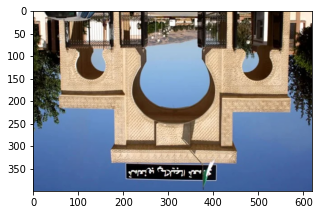

In [ ]:
plt.figure(figsize=(5,5))
plt.imshow(cv2.cvtColor(array_flip, cv2.COLOR_BGR2RGB))
plt.show()

<code>OpenCV</code>has several ways to flip an image, we can use  the <code>flip()</code> function; we have the input image array. The parameter is the <code>flipCode</code>

is the value indicating what kind of flip we would like to perform;

<li><code>flipcode</code> = 0: flip vertically around the x-axis</li>
<li><code>flipcode</code> > 0: flip horizontally around y-axis positive value</li>
<li><code>flipcode</code>&#60 0: flip vertically and horizontally, flipping around both axes negative value</li>
Let apply different <code>flipcode</code>'s in a loop:


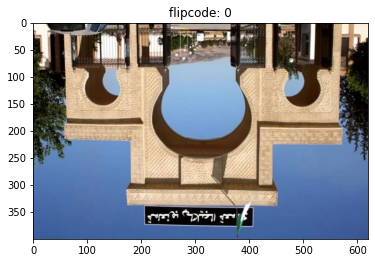

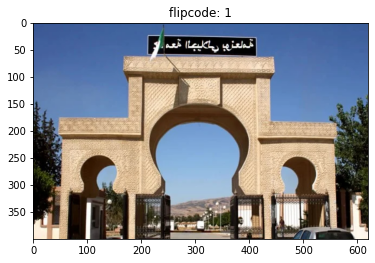

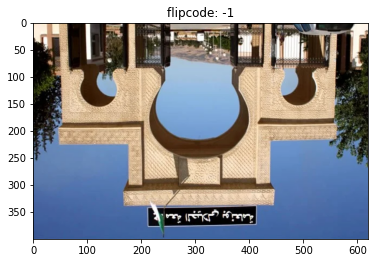

In [ ]:
for flipcode in [0,1,-1]:
    im_flip =  cv2.flip(image,flipcode )
    plt.imshow(cv2.cvtColor(im_flip,cv2.COLOR_BGR2RGB))
    plt.title("flipcode: "+str(flipcode))
    plt.show()

We can also use the <code>rotate()</code> function. The parameter is an integer indicating what kind of flip we would like to perform.


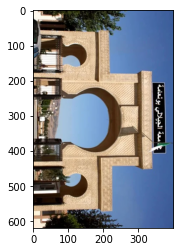

In [ ]:
im_flip = cv2.rotate(image,0)
plt.imshow(cv2.cvtColor(im_flip,cv2.COLOR_BGR2RGB))
plt.show()

OpenCV module has built-in attributes the describe the type of flip, the values are just integers. Several are shown in the following <code>dict</code>:


In [ ]:
flip = {"ROTATE_90_CLOCKWISE":cv2.ROTATE_90_CLOCKWISE,"ROTATE_90_COUNTERCLOCKWISE":cv2.ROTATE_90_COUNTERCLOCKWISE,"ROTATE_180":cv2.ROTATE_180}

We see the keys are just an integer


In [ ]:
flip["ROTATE_90_CLOCKWISE"]

0

We can plot each of the outputs using the different  parameter values


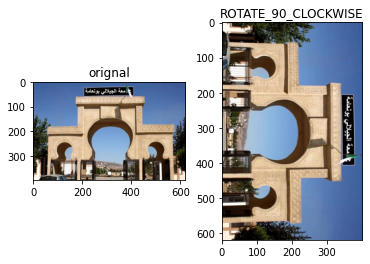

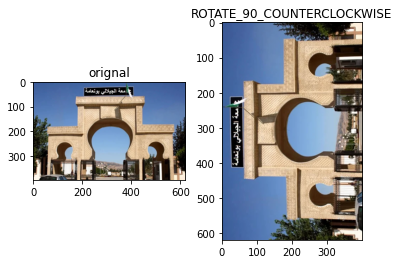

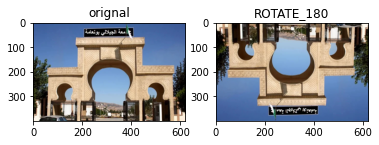

In [ ]:
for key, value in flip.items():
    plt.subplot(1,2,1)
    plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    plt.title("orignal")
    plt.subplot(1,2,2)
    plt.imshow(cv2.cvtColor(cv2.rotate(image,value), cv2.COLOR_BGR2RGB))
    plt.title(key)
    plt.show()

In [ ]:
!pip install simplecv

     |████████████████████████████████| 213 kB 5.4 MB/s 
  Created wheel for simplecv: filename=SimpleCV-1.3-py3-none-any.whl size=242878 sha256=750620c602a619a955babaccb37f49023d6632f6566592511be221fcd57cfbb4
  Stored in directory: /root/.cache/pip/wheels/e0/70/bd/7e5a139799588d961c76e04f56e191d9666e6533d5fb31a02d
Successfully built simplecv


In [ ]:
import SimpleCV

from SimpleCV import Image
img =image.copy() #Image('jacopo.png')
# Rotate the image and make it half the size
rot = img.rotate(90, scale=.5)
rot.show()

SyntaxError: ignored

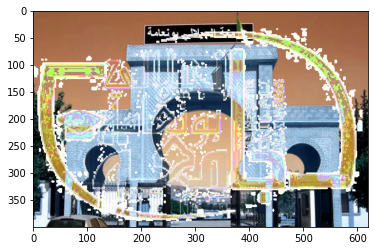

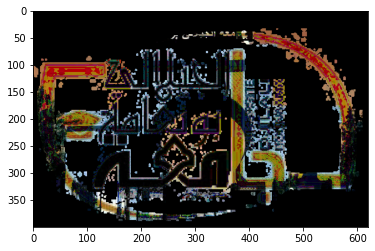

In [ ]:
# Load the original image (250x250):
fimage = cv2.imread('first.png')
# Load the binary image (but as a GBR color image - with 3 channels)
#(250x250):
binary_image = cv2.imread('last.png')
# Bitwise AND
bitwise_and = cv2.bitwise_and(np.array(image), binary_image)
# Bitwise OR
bitwise_or = cv2.bitwise_or(image, binary_image)

plt.imshow(bitwise_or)
plt.show()
plt.imshow(bitwise_and)
plt.show()

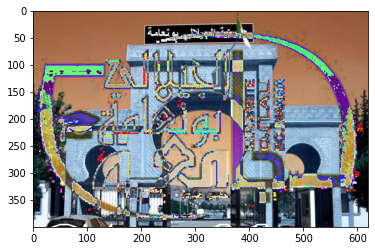

In [ ]:
bf=binary_image+image
plt.imshow(bf)
plt.show()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: RuntimeWarning: divide by zero encountered in true_divide
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: RuntimeWarning: invalid value encountered in true_divide
  """Entry point for launching an IPython kernel.
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


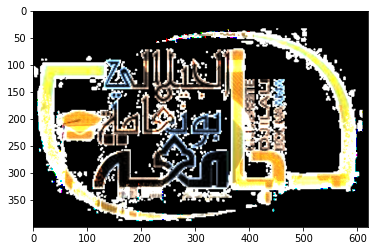

In [ ]:
bf=binary_image/fimage
plt.imshow(bf)
plt.show()

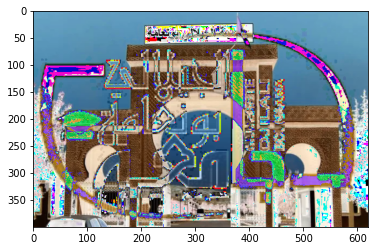

In [ ]:
bf=binary_image-fimage
plt.imshow(bf)
plt.show()

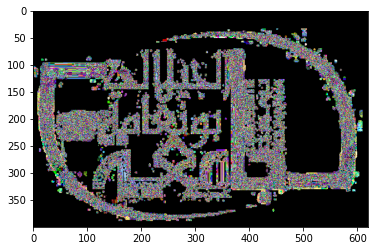

In [ ]:
bf=binary_image*fimage
plt.imshow(bf)
plt.show()

Translation

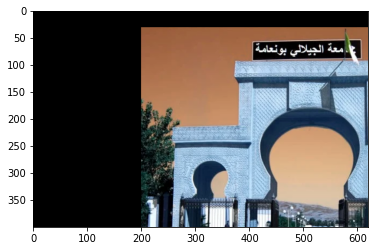

In [ ]:
height, width = image.shape[:2]
M = np.float32([[1, 0, 200], [0, 1, 30]])
dst_image = cv2.warpAffine(image, M, (width, height))
plt.imshow(dst_image)
plt.show()


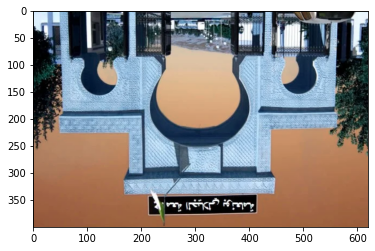

In [ ]:
height, width = image.shape[:2]
M = cv2.getRotationMatrix2D((width / 2.0, height / 2.0), 180, 1)
dst_image = cv2.warpAffine(image, M, (width, height))
plt.imshow(dst_image)
plt.show()


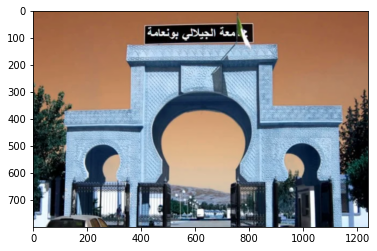

In [ ]:
resized_image = cv2.resize(image, (width * 2, height * 2),
interpolation=cv2.INTER_LINEAR)
plt.imshow(resized_image)
plt.show()


## Cropping an Image


Cropping is "cutting out" the part of the image and throwing out the rest; we can crop using arrays. Let start with a vertical crop; the variable <code>upper</code> is the first row that we would like to include in the image, the variable <code>lower</code> is the last row we would like to include. We then use slicing to obtain the new image.


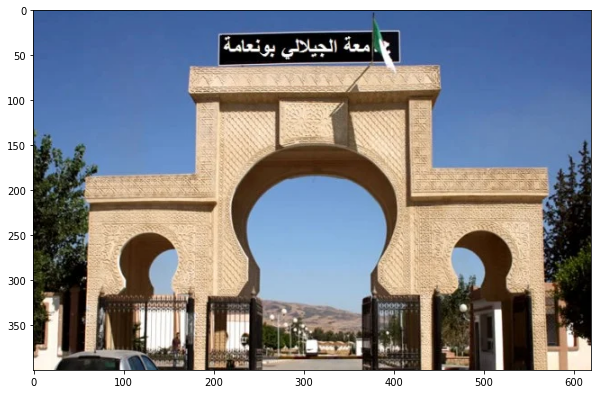

In [ ]:
upper = 150
lower = 400
crop_top = image
plt.figure(figsize=(10,10))
plt.imshow(cv2.cvtColor(crop_top, cv2.COLOR_BGR2RGB))
plt.show()

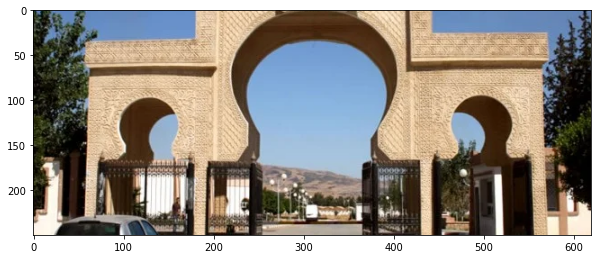

In [ ]:
upper = 150
lower = 400
crop_top = image[upper: lower,:,:]
plt.figure(figsize=(10,10))
plt.imshow(cv2.cvtColor(crop_top, cv2.COLOR_BGR2RGB))
plt.show()

consider the array <code>crop_top</code> we  can also crop horizontally  the variable right is the first column that we would like to include in the image, the variable left is the last column we would like to include in the image.


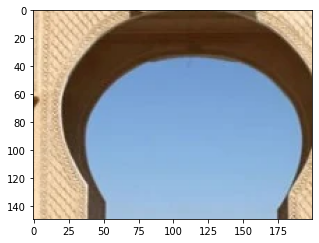

In [ ]:
left = 200
right = 400
upper = 150
lower = 300
crop_horizontal = image[upper:lower ,left:right,:] 
plt.figure(figsize=(5,5))
plt.imshow(cv2.cvtColor(crop_horizontal, cv2.COLOR_BGR2RGB))
plt.show()

## Changing Specific Image Pixels


We can change specific image pixels using  array indexing; for example, we can set  all the channels in the original image we cropped to zero :


In [ ]:
array_sq = np.copy(image)
array_sq[upper:lower,left:right,:] = 0

We can compare the results to the new image.


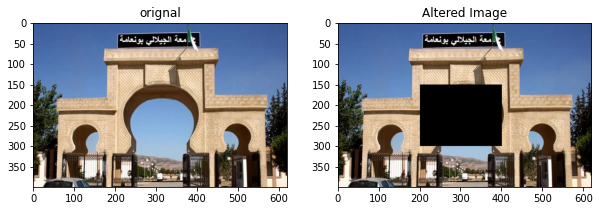

In [ ]:
plt.figure(figsize=(10,10))
plt.subplot(1,2,1)
plt.imshow(cv2.cvtColor(image,cv2.COLOR_BGR2RGB))
plt.title("orignal")
plt.subplot(1,2,2)
plt.imshow(cv2.cvtColor(array_sq,cv2.COLOR_BGR2RGB))
plt.title("Altered Image")
plt.show()

We can also create shapes and <code>OpenCV</code>, we can use the method <code>rectangle</code>. The parameter  <code>pt1</code> is the top-left coordinate of the rectangle: <code>(left,top)</code> or $(x\_0,y\_0)$, <code>pt2</code> is the bottom right coordinate<code>(right,lower)</code> or $(x\_1,y\_1)$. The parameter <code>color</code>  is a tuple representing the intensity of each channel <code>( blue, green, red)</code>. Finally, we have the line thickness.


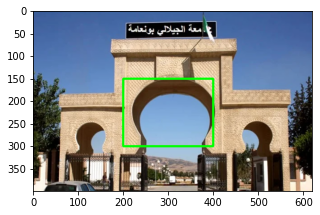

In [ ]:
start_point, end_point = (left, upper),(right, lower)
image_draw = np.copy(image)
cv2.rectangle(image_draw, pt1=start_point, pt2=end_point, color=(0, 255, 0), thickness=3) 
plt.figure(figsize=(5,5))
plt.imshow(cv2.cvtColor(image_draw, cv2.COLOR_BGR2RGB))
plt.show()

We can overlay text on an image using the function  <code>putText</code> with the following parameter values:


 <li><code>img</code>: Image array </li>
<li><code>text</code>: Text string to be overlayed</li>
<li><code>org</code>: Bottom-left corner of the text string in the image</li>
<li><code>fontFace</code>: tye type of font </li>
<li><code>fontScale</code>: Font scale</li>
<li><code>color</code>: Text color</li>
<li><code>thickness</code>: Thickness of the lines used to draw a text</li>
<li><code>lineType:</code> Line type</li>


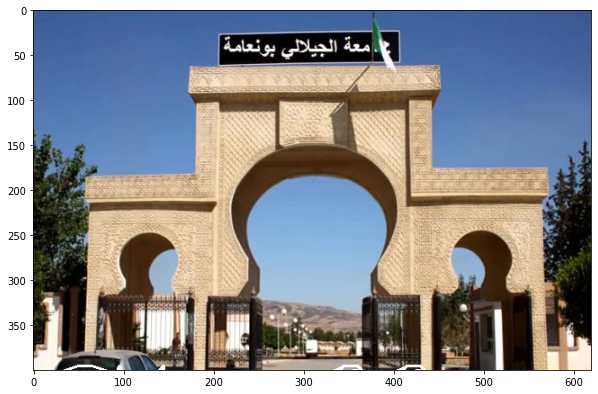

In [ ]:
image_draw=cv2.putText(img=image,text='Stuff',org=(10,500),color=(255,255,255),fontFace=4,fontScale=5,thickness=2)
plt.figure(figsize=(10,10))
plt.imshow(cv2.cvtColor(image_draw,cv2.COLOR_BGR2RGB))
plt.show()

# References




\[1]  <a href='https://pillow.readthedocs.io/en/stable/index.html?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkCV0101ENCoursera25797139-2021-01-01'>Pillow Docs</a>

\[2]  <a href='https://opencv.org/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkCV0101ENCoursera25797139-2021-01-01'>Open CV</a>

\[3] Gonzalez, Rafael C., and Richard E. Woods. "Digital image processing." (2017).
